# Let's Create Linear Regression from scratch

### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### importing data

In [60]:
data=pd.read_csv(r'C:\Users\Vishnu\Desktop\datas\salary.csv')

X,y=np.array(data["YearsExperience"]),np.array(data["Salary"])

In [61]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [94]:
data

,YearsExperience,Salary,age,company_change,type,Unnamed: 5
0,1.1,39343,21,1,junior,NaN
1,1.3,46205,31,0,middle,NaN
2,1.5,37731,29,1,middle,NaN
3,2.0,43525,30,1,middle,NaN
4,2.2,39891,27,1,middle,NaN
5,2.9,56642,36,0,middle,NaN
6,3.0,60150,30,0,middle,NaN
7,3.2,54445,34,1,middle,NaN
8,3.2,64445,29,0,middle,NaN
9,3.7,57189,36,1,middle,NaN


### Visualizing the data

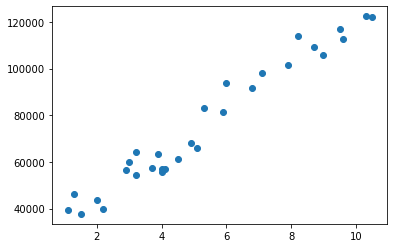

In [63]:
plt.scatter(X,y)

> as we can see experience has high correlation with target 

### Standardizing the data

In [72]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
scal=StandardScaler()
X=scal.fit_transform(X.reshape(-1,1))

In [73]:
X

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

### Linear Regression Model

In [74]:
import numpy as np
class Linear_Regression:

    def __init__(self,iteration=10000,lr=0.01):
        self.weights=None
        self.bias=None
        self.iteration=iteration
        self.lr=lr
    
    def fit(self,X,y):
        self.X=X
        self.y=y
        n=len(self.X)
        
        if len(X.shape)>1:
            n_samples,n_features=self.X.shape
            self.weights=np.zeros(n_features)
            self.bias=0
        else:
            n_samples=1
            self.weights=0
            self.bias=0
        for i in range(self.iteration):
            
            prediction=[self.liner(i) for i in self.X]

            self.cost=(1/n_samples)*(sum([i**2 for i in (self.y-prediction)]))
      
            dm=(-2/n_samples)*(np.dot(self.X.T,(self.y-prediction)))
        
            dc=(-2/n_samples)*sum(self.y-prediction)
            
            self.weights=self.weights-(self.lr*dm)
            self.bias=self.bias-(self.lr*dc)
        print("LinearRegression()")
        
    def liner(self,x):
        return np.dot(x,self.weights)+self.bias
    
    def score(self,):
        ss_mean=np.mean(self.y)
        variance_mean = sum((i-ss_mean)**2 for i in self.y)/len(self.y)
        variance_fit=self.cost/len(self.y)
#         r_square = (variance_mean-variance_fit)/variance_mean
        r_square=1-(variance_fit/variance_mean)
        print("This is the R-Square score for the training data: ",str(r_square))
    
    def predict(self,new_x):
        new_predicted_y=np.array([self.liner(i) for i in new_x])
        return new_predicted_y
    
    def coef(self):
        print("coef is ={}".format(self.m))
        
    def intercept(self):
        print("intercept is ={}".format(self.c))


In [75]:
# Initialize the model
model=Linear_Regression()

In [76]:
# Training the data
model.fit(X,y)

LinearRegression()


In [79]:
#Making Prediction
model.predict([[scal.transform([[7.1]])]])

array([[[92886.932681]]])

In [81]:
# Checking the mean squared error
from sklearn.metrics import mean_squared_error

mean_squared_error(y,predicted)

31270951.72228098

# Now let's compare our model with sklearn linear regression

In [88]:
from sklearn.linear_model import LinearRegression


In [89]:
# Initialize the model
model1=LinearRegression()

In [90]:
# Training the model
model1.fit(X,y)

LinearRegression()

In [92]:
# Making prediction
model1.predict(scal.transform([[7.1]]))

array([92886.932681])

In [93]:
#Checking the mean square error
mean_squared_error(y,p2)

31270951.722280957

# We obtained same amount of mean square error 